# **Trabalho de TCC2 - Aplicando SVR para predizer a frequência de ressonância de antenas de microfita**

**Importação e instalação das bibliotecas necessárias**

In [1]:
# Importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Download dos Datasets diretamente do Google Drive**

In [2]:
# Download all 5 datasets
!gdown 1g0h18KUiMvX77avnX_9dK_U0jgy_mn3B # Real_2,2
!gdown 1dhVoEx7ZBpvSj-rrAh4X9fO8Ja7ogUOl # Real_3,0
!gdown 1p0k9vfatrCmUOsef5ELYe2ms85iPAW8H # Real_4,4
!gdown 1SEj43t9AWzAY6hHaRWIX4K3P3dEsaF2I # Real_6,15
!gdown 10EwYwMl9YvPbHZu6wRWIhNH3Hmlrlr-e # Real_10,2

Downloading...
From: https://drive.google.com/uc?id=1g0h18KUiMvX77avnX_9dK_U0jgy_mn3B
To: /content/Real_2_2.csv
100% 235k/235k [00:00<00:00, 15.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dhVoEx7ZBpvSj-rrAh4X9fO8Ja7ogUOl
To: /content/Real_3_0.csv
100% 235k/235k [00:00<00:00, 3.55MB/s]
Downloading...
From: https://drive.google.com/uc?id=1p0k9vfatrCmUOsef5ELYe2ms85iPAW8H
To: /content/Real_4_4.csv
100% 234k/234k [00:00<00:00, 4.42MB/s]
Downloading...
From: https://drive.google.com/uc?id=1SEj43t9AWzAY6hHaRWIX4K3P3dEsaF2I
To: /content/Real_6_15.csv
100% 235k/235k [00:00<00:00, 34.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=10EwYwMl9YvPbHZu6wRWIhNH3Hmlrlr-e
To: /content/Real_10_2.csv
100% 234k/234k [00:00<00:00, 3.61MB/s]


## **Exploratory Data Analysis**

**Cálculo de todas as frequências de ressonância de acordo com o valor de ϵ**

A equação é:


$\left( \frac{c}{2 * L * \sqrt{ ϵ}} \right) [Hz]$

In [3]:
# This step calculate all the differents resonant frequencies for all L and epsilon values
from math import sqrt
import numpy as np
from scipy.constants import c


# List Comprehension criando valores para L variando de 10 mm até 40 mm
# com passo de 1 mm
lista_l = [float(valor) for valor in range(10,41)]

# Função que gera as frequências de ressonância calculadas

def gerar_frequencias(lista_freq:list, eps):
    fr_0_GHz = [(c/(2 * (elem/1000)* sqrt(eps))/(10**9)) for elem in lista_freq]
    return fr_0_GHz


# Chamando a função gerar_frequencias para mapear as frequências de ressonância
# de acordo com o epsilon desejado
lista_freq_epsilon_2_20 = gerar_frequencias(lista_l, eps=2.2)
lista_freq_epsilon_3_00 = gerar_frequencias(lista_l, eps=3)
lista_freq_epsilon_4_40 = gerar_frequencias(lista_l, eps=4.4)
lista_freq_epsilon_6_15 = gerar_frequencias(lista_l, eps=6.15)
lista_freq_epsilon_10_2 = gerar_frequencias(lista_l, eps=10.2)

# Print estético para separação de linhas
print('\-/-\-/'*100)
print("\n")


# Print das listas contendo todos os valores de L e todas as frequências de
# ressonância calculadas para os diferentes valores de L e de epsilon_r
print(f'Cálculo de valores da frequência de ressonância para todos os valores de epsilon:')
print(f"Valores de L[mm]:                                         {lista_l}")
print(f"Frequências de ressonância para epsilon =  02.20 [GHz]:   {lista_freq_epsilon_2_20}")
print(f"Frequências de ressonância para epsilon =  03.00 [GHz]:   {lista_freq_epsilon_3_00}")
print(f"Frequências de ressonância para epsilon =  04.40 [GHz]:   {lista_freq_epsilon_4_40}")
print(f"Frequências de ressonância para epsilon =  06.15 [GHz]:   {lista_freq_epsilon_6_15}")
print(f"Frequências de ressonância para epsilon =  10.20 [GHz]:   {lista_freq_epsilon_10_2}")

# Print estético para separação de linhas
print("\n")
print('\-/-\-/'*100)


\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/


Cálculo de valores da frequência de ressonância para todos os valores de epsilon:
Valores de L[mm]:                                         [10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 

---

**Leitura dos arquivos .csv gerados pelo ANSYS**

In [4]:
# Reading the datasets
arq1 = 'Real_2_2'
df1 = pd.read_csv(arq1 +'.csv')

arq2 = 'Real_3_0'
df2 = pd.read_csv(arq2 +'.csv')

arq3 = 'Real_4_4'
df3 = pd.read_csv(arq3 +'.csv')

arq4 = 'Real_6_15'
df4 = pd.read_csv(arq4 +'.csv')

arq5 = 'Real_10_2'
df5 = pd.read_csv(arq5 +'.csv')

**Renomeando a coluna do Dataset original para possibilitar um acesso mais fácil a métodos do Dataframe**

In [5]:
# Renaming the columns
df1.rename(
    columns={"L [mm]": "L", "Freq [GHz]": "Freq", "re(Z(1,1)) []": "re"},
    inplace=True,
)

df2.rename(
    columns={"L [mm]": "L", "Freq [GHz]": "Freq", "re(Z(1,1)) []": "re"},
    inplace=True,
)

df3.rename(
    columns={"L [mm]": "L", "Freq [GHz]": "Freq", "re(Z(1,1)) []": "re"},
    inplace=True,
)

df4.rename(
    columns={"L [mm]": "L", "Freq [GHz]": "Freq", "re(Z(1,1)) []": "re"},
    inplace=True,
)

df5.rename(
    columns={"L [mm]": "L", "Freq [GHz]": "Freq", "re(Z(1,1)) []": "re"},
    inplace=True,
)

**Adicionando uma coluna para h e adicionando uma coluna com L como tipo str para fazer query**

In [6]:
# Creating a new column for 'h'
df1['h'] = df1['L'] * 0.0479
df2['h'] = df2['L'] * 0.0479
df3['h'] = df3['L'] * 0.0479
df4['h'] = df4['L'] * 0.0479
df5['h'] = df5['L'] * 0.0479

**Adicionando uma coluna com L como tipo str para fazer query**

In [7]:
# Creating a new column for 'L2'
df1['L2'] = df1['L'].astype('str')
df2['L2'] = df2['L'].astype('str')
df3['L2'] = df3['L'].astype('str')
df4['L2'] = df4['L'].astype('str')
df5['L2'] = df5['L'].astype('str')

**Criação de todos os subdatasets para os diferentes valores de L e de ϵ**

In [8]:
# Reading all files and separating them by L
for i in range(10, 41):
    x = str(i)
    query_criador_subdatasets1 = df1.query("L2 == @x")
    query_criador_subdatasets1.to_csv('sub' + arq1 + '_' + x + '.csv', index=False)

    query_criador_subdatasets2 = df2.query("L2 == @x")
    query_criador_subdatasets2.to_csv('sub' + arq2 + '_' + x + '.csv', index=False)

    query_criador_subdatasets3 = df3.query("L2 == @x")
    query_criador_subdatasets3.to_csv('sub' + arq3 + '_' + x + '.csv', index=False)

    query_criador_subdatasets4 = df4.query("L2 == @x")
    query_criador_subdatasets4.to_csv('sub' + arq4 + '_' + x + '.csv', index=False)

    query_criador_subdatasets5 = df5.query("L2 == @x")
    query_criador_subdatasets5.to_csv('sub' + arq5 + '_' + x + '.csv', index=False)

**Criando dicionários que irão conter um certo padrão que condiz com o SubDataset.**

In [9]:
# Creating dictionaries that'll separate all datasets by epsilon
dict_2_2 = {}
dict_3_0 = {}
dict_4_4 = {}
dict_6_15 = {}
dict_10_2 = {}


for i in range(10, 41):
    dict_2_2.update({'Real_2_2' + '_' + str(i): pd.read_csv('sub' + 'Real_2_2' + '_' + str(i) + '.csv')})
    dict_3_0.update({'Real_3_0' + '_' + str(i): pd.read_csv('sub' + 'Real_3_0'+ '_' + str(i) + '.csv')})
    dict_4_4.update({'Real_4_4' + '_' + str(i): pd.read_csv('sub' + 'Real_4_4' + '_' + str(i) + '.csv')})
    dict_6_15.update({'Real_6_15' + '_' + str(i): pd.read_csv('sub' + 'Real_6_15' + '_' + str(i) + '.csv')})
    dict_10_2.update({'Real_10_2' + '_' + str(i): pd.read_csv('sub' + 'Real_10_2' + '_' + str(i) + '.csv')})


**Mostrando um dos SubDatasets atualizados**

In [10]:
# Informations about the dictionary that contains L = 10 and epsilon = 2.2
dict_2_2['Real_2_2_10'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   L       200 non-null    int64  
 1   Freq    200 non-null    float64
 2   re      200 non-null    float64
 3   h       200 non-null    float64
 4   L2      200 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 7.9 KB


Mostra os últimos valores do dataset para L = 10 mm e epsilon = 2.2

In [11]:
# Show the last 50 values of the dataset for L = 10 mm and epsilon = 2.2
dict_2_2['Real_2_2_10'].tail(50)

,L,Freq,re,h,L2
150,10,8.513065,119.665079,0.479,10
151,10,8.563819,162.596156,0.479,10
152,10,8.614573,211.395009,0.479,10
153,10,8.665327,251.072785,0.479,10
154,10,8.716080,263.893462,0.479,10
155,10,8.766834,248.070276,0.479,10
156,10,8.817588,217.806770,0.479,10
157,10,8.868342,186.643207,0.479,10
158,10,8.919095,160.602078,0.479,10
159,10,8.969849,140.780160,0.479,10


**Utilizando a janela móvel para descobrir os picos e vales dos dados discretos dos Datasets. Para isso, foi feito um for loop iterando sobre todo o dicionário que contém os Datasets, fazendo uso de padrões na nomenclatura feitos anteriormente para fazer essa tarefa automaticamente para todos os 155 SubDatasets.**

In [12]:
# Using a rolling window to find wich points are bigger than the previous one
# evaluating the 'max_re' column. A new column 'pico_re' is also initialized
# with False
window_size = 1

for i in range(10, 41):
    dict_2_2['Real_2_2' + '_' + str(i)]['max_re'] = dict_2_2['Real_2_2' + '_' + str(i)]['re'].rolling(window_size, min_periods=0).max()
    dict_2_2['Real_2_2' + '_' + str(i)]['Maior_que_anterior'] = (dict_2_2['Real_2_2' + '_' + str(i)]['re'] == dict_2_2['Real_2_2' + '_' + str(i)]['max_re']) & (dict_2_2['Real_2_2' + '_' + str(i)]['re'] >dict_2_2['Real_2_2' + '_' + str(i)]['re'].shift())
    dict_2_2['Real_2_2' + '_' + str(i)]['Pico_re'] = False

    dict_3_0['Real_3_0' + '_' + str(i)]['max_re'] = dict_3_0['Real_3_0' + '_' + str(i)]['re'].rolling(window_size, min_periods=0).max()
    dict_3_0['Real_3_0' + '_' + str(i)]['Maior_que_anterior'] = (dict_3_0['Real_3_0' + '_' + str(i)]['re'] == dict_3_0['Real_3_0' + '_' + str(i)]['max_re']) & (dict_3_0['Real_3_0' + '_' + str(i)]['re'] > dict_3_0['Real_3_0' + '_' + str(i)]['re'].shift())
    dict_3_0['Real_3_0' + '_' + str(i)]['Pico_re'] = False

    dict_4_4['Real_4_4' + '_' + str(i)]['max_re'] =  dict_4_4['Real_4_4' + '_' + str(i)]['re'].rolling(window_size, min_periods=0).max()
    dict_4_4['Real_4_4' + '_' + str(i)]['Maior_que_anterior'] = (dict_4_4['Real_4_4' + '_' + str(i)]['re'] ==  dict_4_4['Real_4_4' + '_' + str(i)]['max_re']) & ( dict_4_4['Real_4_4' + '_' + str(i)]['re'] >  dict_4_4['Real_4_4' + '_' + str(i)]['re'].shift())
    dict_4_4['Real_4_4' + '_' + str(i)]['Pico_re'] = False

    dict_6_15['Real_6_15' + '_' + str(i)]['max_re'] = dict_6_15['Real_6_15' + '_' + str(i)]['re'].rolling(window_size, min_periods=0).max()
    dict_6_15['Real_6_15' + '_' + str(i)]['Maior_que_anterior'] = (dict_6_15['Real_6_15' + '_' + str(i)]['re'] == dict_6_15['Real_6_15' + '_' + str(i)]['max_re']) & (dict_6_15['Real_6_15' + '_' + str(i)]['re'] > dict_6_15['Real_6_15' + '_' + str(i)]['re'].shift())
    dict_6_15['Real_6_15' + '_' + str(i)]['Pico_re'] = False

    dict_10_2['Real_10_2' + '_' + str(i)]['max_re'] = dict_10_2['Real_10_2' + '_' + str(i)]['re'].rolling(window_size, min_periods=0).max()
    dict_10_2['Real_10_2' + '_' + str(i)]['Maior_que_anterior'] = (dict_10_2['Real_10_2' + '_' + str(i)]['re'] == dict_10_2['Real_10_2' + '_' + str(i)]['max_re']) & (dict_10_2['Real_10_2' + '_' + str(i)]['re'] >dict_10_2['Real_10_2' + '_' + str(i)]['re'].shift())
    dict_10_2['Real_10_2' + '_' + str(i)]['Pico_re'] = False


**Mostrando o um dos Datasets dentro do dicionário atualizado.**

In [13]:
# Show nome data updated
dict_10_2['Real_10_2_40'].tail(50)

,L,Freq,re,h,L2,max_re,Maior_que_anterior,Pico_re
150,40,8.513065,30.888515,1.916,40,30.888515,True,False
151,40,8.563819,13.470976,1.916,40,13.470976,False,False
152,40,8.614573,7.128243,1.916,40,7.128243,False,False
153,40,8.665327,5.574086,1.916,40,5.574086,False,False
154,40,8.716080,5.731526,1.916,40,5.731526,True,False
155,40,8.766834,8.441736,1.916,40,8.441736,True,False
156,40,8.817588,20.467908,1.916,40,20.467908,True,False
157,40,8.868342,33.882560,1.916,40,33.882560,True,False
158,40,8.919095,42.353345,1.916,40,42.353345,True,False
159,40,8.969849,76.280709,1.916,40,76.280709,True,False


**Percorrendo o dicionário que contém os Datasets e aplicando a operação lógica a seguir na coluna 'Maior_que_anterior':**

**Caso um ponto na coluna 'Maior_que_anterior' seja True e o próximo ponto seja False, isso indica que temos um máximo local no Dataset, e é justamente esse ponto que devemos pegar**

In [14]:
# This is the main logic of the process:
# We are intrested only in local maxima, as they gives the resonant frequency
# for all modes of operation of the antenna. When a point in the column
# 'maior_que_anterior' is True and the very next point is False, that
# indicates that this point is a summit, therefore a value True for that row
# should be placed in the column 'pico_re'
for i in range(0,199):
    for j in range(10,41):
        dict_2_2['Real_2_2' + '_' + str(j)].iloc[i, 7] =  dict_2_2['Real_2_2' + '_' + str(j)].iloc[i,6] and ~ dict_2_2['Real_2_2' + '_' + str(j)].iloc[i+1,6]
        dict_3_0['Real_3_0' + '_' + str(j)].iloc[i, 7] =  dict_3_0['Real_3_0' + '_' + str(j)].iloc[i,6] and ~ dict_3_0['Real_3_0' + '_' + str(j)].iloc[i+1,6]
        dict_4_4['Real_4_4' + '_' + str(j)].iloc[i, 7] =  dict_4_4['Real_4_4' + '_' + str(j)].iloc[i,6] and ~ dict_4_4['Real_4_4' + '_' + str(j)].iloc[i+1,6]
        dict_6_15['Real_6_15' + '_' + str(j)].iloc[i, 7] = dict_6_15['Real_6_15' + '_' + str(j)].iloc[i,6] and ~ dict_6_15['Real_6_15' + '_' + str(j)].iloc[i+1,6]
        dict_10_2['Real_10_2' + '_' + str(j)].iloc[i, 7] = dict_10_2['Real_10_2' + '_' + str(j)].iloc[i,6] and ~ dict_10_2['Real_10_2' + '_' + str(j)].iloc[i+1,6]

**Mostrando o Dataset agora com a coluna 'Pico_re' atualizada para contar se um valor na coluna 'Maior_que_anterior' passou de um valor True para False ou não.**

In [15]:
# Showing data with 'pico_re' updated
dict_2_2['Real_2_2_10'].tail(50)

,L,Freq,re,h,L2,max_re,Maior_que_anterior,Pico_re
150,10,8.513065,119.665079,0.479,10,119.665079,True,False
151,10,8.563819,162.596156,0.479,10,162.596156,True,False
152,10,8.614573,211.395009,0.479,10,211.395009,True,False
153,10,8.665327,251.072785,0.479,10,251.072785,True,False
154,10,8.716080,263.893462,0.479,10,263.893462,True,True
155,10,8.766834,248.070276,0.479,10,248.070276,False,False
156,10,8.817588,217.806770,0.479,10,217.806770,False,False
157,10,8.868342,186.643207,0.479,10,186.643207,False,False
158,10,8.919095,160.602078,0.479,10,160.602078,False,False
159,10,8.969849,140.780160,0.479,10,140.780160,False,False


**Itera sobre o dicionário que contém todos os Datasets e adiciona em todos eles uma coluna que contém a diferença absoluta entre os valores de frequência de ressonância calculadas e frequência de ressonância simulada pelo Ansys.**

In [16]:
# At this point, all resonant frequencies were taken, but we still only need
# the ones for the fundamental mode. This is where the calculade values come in
# as we calculate the absolute difference between the calculated value and the
# simulated value, taking the minimum as the point of fundamental mode.
indice = 0
for j in range(10,41):
    dict_2_2['Real_2_2' + '_' + str(j)]['Diferenca_fr_calculado_simulado'] =  abs(dict_2_2['Real_2_2' + '_' + str(j)]['Freq'] - lista_freq_epsilon_2_20[indice])
    dict_3_0['Real_3_0' + '_' + str(j)]['Diferenca_fr_calculado_simulado'] =  abs(dict_3_0['Real_3_0' + '_' + str(j)]['Freq'] - lista_freq_epsilon_3_00[indice])
    dict_4_4['Real_4_4' + '_' + str(j)]['Diferenca_fr_calculado_simulado'] =  abs(dict_4_4['Real_4_4' + '_' + str(j)]['Freq'] - lista_freq_epsilon_4_40[indice])
    dict_6_15['Real_6_15' + '_' + str(j)]['Diferenca_fr_calculado_simulado'] = abs(dict_6_15['Real_6_15' + '_' + str(j)]['Freq'] - lista_freq_epsilon_6_15[indice])
    dict_10_2['Real_10_2' + '_' + str(j)]['Diferenca_fr_calculado_simulado'] = abs(dict_10_2['Real_10_2' + '_' + str(j)]['Freq'] - lista_freq_epsilon_10_2[indice])
    indice+=1

**Mostra o *Dataset* atualizado com a coluna 'Diferenca_fr_calculado_simulado'**

In [17]:
# Showing the data with the new column 'Diferenca_fr_calculado_simulado'
dict_2_2['Real_2_2_10'].tail(50)

,L,Freq,re,h,L2,max_re,Maior_que_anterior,Pico_re,Diferenca_fr_calculado_simulado
150,10,8.513065,119.665079,0.479,10,119.665079,True,False,1.592936
151,10,8.563819,162.596156,0.479,10,162.596156,True,False,1.542183
152,10,8.614573,211.395009,0.479,10,211.395009,True,False,1.491429
153,10,8.665327,251.072785,0.479,10,251.072785,True,False,1.440675
154,10,8.716080,263.893462,0.479,10,263.893462,True,True,1.389921
155,10,8.766834,248.070276,0.479,10,248.070276,False,False,1.339168
156,10,8.817588,217.806770,0.479,10,217.806770,False,False,1.288414
157,10,8.868342,186.643207,0.479,10,186.643207,False,False,1.237660
158,10,8.919095,160.602078,0.479,10,160.602078,False,False,1.186906
159,10,8.969849,140.780160,0.479,10,140.780160,False,False,1.136152


**Com a nova forma, o código abaixo se refere a query para acessar os dicionários que contem todos os subdatasets e todas as colunas necessárias para avaliar a frequância de ressonância.**

In [18]:
# Make a query to only values where 'pico_re' is True and make a copy dataframe
novo_teste_dataframe = dict_2_2['Real_2_2_10'].query('Pico_re == True').copy()
novo_teste_dataframe

,L,Freq,re,h,L2,max_re,Maior_que_anterior,Pico_re,Diferenca_fr_calculado_simulado
40,10,2.930151,3434.795394,0.479,10,3434.795394,True,True,7.175851
154,10,8.716080,263.893462,0.479,10,263.893462,True,True,1.389921
174,10,9.731156,428.707557,0.479,10,428.707557,True,True,0.374846


**Cria um filtro dentro do *SubDataset* que retornará somente a linha onde há True na coluna 'Pico_re' e a coluna 'Diferenca_fr_calculado_simulado' é o valor mínimo, sendo esse ponto aquele que contém a frequência de ressonância desejada**

In [19]:
# A filter model that takes only the row where 'Diferenca_fr_calculado_simulado'
# is the minimum possible and 'Pico_re' is True
novo_teste_dataframe[((novo_teste_dataframe['Diferenca_fr_calculado_simulado'] == \
                       novo_teste_dataframe['Diferenca_fr_calculado_simulado'].min()) & \
                      (novo_teste_dataframe['Pico_re'] == True))]

,L,Freq,re,h,L2,max_re,Maior_que_anterior,Pico_re,Diferenca_fr_calculado_simulado
174,10,9.731156,428.707557,0.479,10,428.707557,True,True,0.374846


---

**Criando 5 Datasets finais (1 para cada ϵ), inicialmente contendo 31 linhas todas com valores nulos,falsos ou uma string '0'**

In [20]:
# Create 5 new datasets with the filtered data
dataframe_antenas_final_2_2 = pd.DataFrame({'L':[0],
                                            'Freq':[0],
                                            're':[0],
                                            'h':[0],
                                            'L2':0,
                                            'max_re':[0],
                                            'Maior_que_anterior':[True],
                                            'Pico_re':[True],
                                            'Diferenca_fr_calculado_simulado':[0]},
                                            index=np.arange(31))


In [21]:
dataframe_antenas_final_3_0 = pd.DataFrame({'L':[0],
                                            'Freq':[0],
                                            're':[0],
                                            'h':[0],
                                            'L2':0,
                                            'max_re':[0],
                                            'Maior_que_anterior':[True],
                                            'Pico_re':[True],
                                            'Diferenca_fr_calculado_simulado':[0]},
                                            index=np.arange(31))


In [22]:
dataframe_antenas_final_4_4 = pd.DataFrame({'L':[0],
                                            'Freq':[0],
                                            're':[0],
                                            'h':[0],
                                            'L2':0,
                                            'max_re':[0],
                                            'Maior_que_anterior':[True],
                                            'Pico_re':[True],
                                            'Diferenca_fr_calculado_simulado':[0]},
                                            index=np.arange(31))


In [23]:
dataframe_antenas_final_6_15 = pd.DataFrame({'L':[0],
                                            'Freq':[0],
                                            're':[0],
                                            'h':[0],
                                            'L2':0,
                                            'max_re':[0],
                                            'Maior_que_anterior':[True],
                                            'Pico_re':[True],
                                            'Diferenca_fr_calculado_simulado':[0]},
                                            index=np.arange(31))

In [24]:
dataframe_antenas_final_10_2 = pd.DataFrame({'L':[0],
                                            'Freq':[0],
                                            're':[0],
                                            'h':[0],
                                            'L2':0,
                                            'max_re':[0],
                                            'Maior_que_anterior':[True],
                                            'Pico_re':[True],
                                            'Diferenca_fr_calculado_simulado':[0]},
                                            index=np.arange(31))


**Filtrando os Datasets para obter somente os linhas que contém as frequências de ressonância reais e copiando-as para um novo Dataset final.**

In [25]:
# Add the filtered data to the newly created dataframes
for i in range(0,31):
    filtro_final = dict_2_2['Real_2_2_' + str(i+10)].query('Pico_re == True').copy()
    filtro_final = filtro_final[((filtro_final['Diferenca_fr_calculado_simulado'] == \
                                  filtro_final['Diferenca_fr_calculado_simulado'].min()) & \
                                 (filtro_final['Pico_re'] == True))].copy()
    filtro_final.reset_index(inplace=True, drop=True)
    dataframe_antenas_final_2_2.iloc[i] = filtro_final.copy()


    filtro_final1 = dict_3_0['Real_3_0_' + str(i+10)].query('Pico_re == True').copy()
    filtro_final1 = filtro_final1[((filtro_final1['Diferenca_fr_calculado_simulado'] == \
                                  filtro_final1['Diferenca_fr_calculado_simulado'].min()) & \
                                 (filtro_final1['Pico_re'] == True))].copy()
    filtro_final1.reset_index(inplace=True, drop=True)
    dataframe_antenas_final_3_0.iloc[i] = filtro_final1.copy()


    filtro_final2 = dict_4_4['Real_4_4_' + str(i+10)].query('Pico_re == True').copy()
    filtro_final2 = filtro_final2[((filtro_final2['Diferenca_fr_calculado_simulado'] == \
                                  filtro_final2['Diferenca_fr_calculado_simulado'].min()) & \
                                 (filtro_final2['Pico_re'] == True))].copy()
    filtro_final2.reset_index(inplace=True, drop=True)
    dataframe_antenas_final_4_4.iloc[i] = filtro_final2.copy()


    filtro_final3 = dict_6_15['Real_6_15_' + str(i+10)].query('Pico_re == True').copy()
    filtro_final3 = filtro_final3[((filtro_final3['Diferenca_fr_calculado_simulado'] == \
                                  filtro_final3['Diferenca_fr_calculado_simulado'].min()) & \
                                 (filtro_final3['Pico_re'] == True))].copy()
    filtro_final3.reset_index(inplace=True, drop=True)
    dataframe_antenas_final_6_15.iloc[i] = filtro_final3.copy()


    filtro_final4 = dict_10_2['Real_10_2_' + str(i+10)].query('Pico_re == True').copy()
    filtro_final4 = filtro_final4[((filtro_final4['Diferenca_fr_calculado_simulado'] == \
                                  filtro_final4['Diferenca_fr_calculado_simulado'].min()) & \
                                 (filtro_final4['Pico_re'] == True))].copy()
    filtro_final4.reset_index(inplace=True, drop=True)
    dataframe_antenas_final_10_2.iloc[i] = filtro_final4.copy()

In [27]:
# Showing a dataframe for epsilon = 10.2
dataframe_antenas_final_10_2

,L,Freq,re,h,L2,max_re,Maior_que_anterior,Pico_re,Diferenca_fr_calculado_simulado
0,10,4.757286,144.193076,0.4790,10,144.193076,True,True,0.063853
1,11,4.300503,140.642928,0.5269,11,140.642928,True,True,0.033745
2,12,3.945226,96.892506,0.5748,12,96.892506,True,True,0.034032
3,13,3.640704,179.649651,0.6227,13,179.649651,True,True,0.030370
4,14,3.386935,140.608362,0.6706,14,140.608362,True,True,0.034483
5,15,3.183920,77.460507,0.7185,15,77.460507,True,True,0.054964
6,16,2.980905,155.398591,0.7664,16,155.398591,True,True,0.047509
7,17,2.777889,114.548410,0.8143,17,114.548410,True,True,0.017047
8,18,2.625628,46.826130,0.8622,18,46.826130,True,True,0.018165
9,19,2.524121,60.815279,0.9101,19,60.815279,True,True,0.053893


**Gerando os 6 Dataframes (5 para os diferentes valores de $\epsilon$ e 1 combinado)**

In [28]:
# Save all filtered data into new csv files
dataframe_antenas_final_2_2.to_csv('dataframe_antenas_final_2_2.csv', index=False)
dataframe_antenas_final_3_0.to_csv('dataframe_antenas_final_3_0.csv', index=False)
dataframe_antenas_final_4_4.to_csv('dataframe_antenas_final_4_4.csv', index=False)
dataframe_antenas_final_6_15.to_csv('dataframe_antenas_final_6_15.csv', index=False)
dataframe_antenas_final_10_2.to_csv('dataframe_antenas_final_10_2.csv', index=False)

**Lendo os 5 Dataframes gerados**

In [30]:
# Reading again to show that it worked
df_final_22 = pd.read_csv('dataframe_antenas_final_2_2.csv')
df_final_30 = pd.read_csv('dataframe_antenas_final_3_0.csv')
df_final_44 = pd.read_csv('dataframe_antenas_final_4_4.csv')
df_final_615 = pd.read_csv('dataframe_antenas_final_6_15.csv')
df_final_102 = pd.read_csv('dataframe_antenas_final_10_2.csv')

**Mostrando 1 dos Datframes**

In [31]:
# Showing the read dataframe
df_final_22

,L,Freq,re,h,L2,max_re,Maior_que_anterior,Pico_re,Diferenca_fr_calculado_simulado
0,10,9.731156,428.707557,0.4790,10,428.707557,True,True,0.374846
1,11,9.223618,964.898311,0.5269,11,964.898311,True,True,0.036344
2,12,8.817588,1093.230866,0.5748,12,1093.230866,True,True,0.395920
3,13,8.462312,1073.160923,0.6227,13,1073.160923,True,True,0.688464
4,14,6.584422,46.163168,0.6706,14,46.163168,True,True,0.634151
5,15,6.178392,42.824403,0.7185,15,42.824403,True,True,0.558943
6,16,5.823116,39.232045,0.7664,16,39.232045,True,True,0.493135
7,17,5.518593,33.282208,0.8143,17,33.282208,True,True,0.426114
8,18,5.214070,42.212907,0.8622,18,42.212907,True,True,0.400375
9,19,4.960302,41.640466,0.9101,19,41.640466,True,True,0.358647


**Plotando um gráfico de dispersão com todos os Datasets contendo as frequências de ressonância**

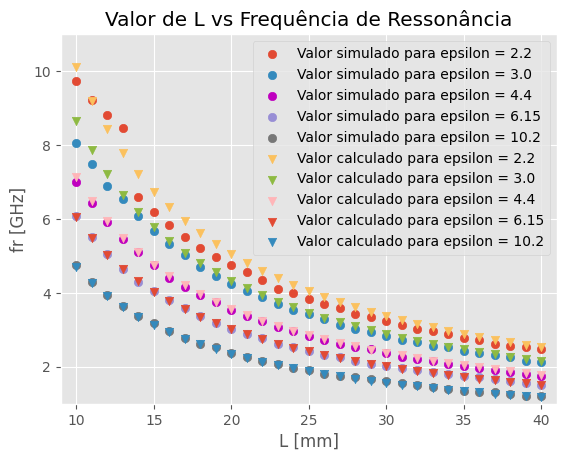

In [32]:
# Making a scatter plot showing calculated and simulated values
plt.style.use("ggplot")
plt.title('Valor de L vs Frequência de Ressonância')
plt.xlabel('L [mm]')
plt.ylabel('fr [GHz]')
plt.xlim([9, 41])
plt.ylim([1, 11])
plt.scatter(df_final_22['L'], df_final_22 ['Freq'])
plt.scatter(df_final_30['L'], df_final_30 ['Freq'])
plt.scatter(df_final_44['L'], df_final_44 ['Freq'],c='m')
plt.scatter(df_final_615['L'], df_final_615 ['Freq'])
plt.scatter(df_final_102['L'], df_final_102 ['Freq'])
plt.scatter(lista_l, lista_freq_epsilon_2_20,marker='v')
plt.scatter(lista_l, lista_freq_epsilon_3_00,marker='v')
plt.scatter(lista_l, lista_freq_epsilon_4_40,marker='v')
plt.scatter(lista_l, lista_freq_epsilon_6_15,marker='v')
plt.scatter(lista_l, lista_freq_epsilon_10_2,marker='v')
plt.legend(['Valor simulado para epsilon = 2.2','Valor simulado para epsilon = 3.0',
            'Valor simulado para epsilon = 4.4','Valor simulado para epsilon = 6.15',
            'Valor simulado para epsilon = 10.2','Valor calculado para epsilon = 2.2',
            'Valor calculado para epsilon = 3.0',
            'Valor calculado para epsilon = 4.4','Valor calculado para epsilon = 6.15',
            'Valor calculado para epsilon = 10.2'])

plt.show()